In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

Using TensorFlow backend.


# **Load**

In [0]:
!ls "drive/My Drive/Colab Notebooks/ICCSP-2020/"

In [0]:
numpy.random.seed(0)
from numpy import genfromtxt
X = pd.read_csv('drive/My Drive/Colab Notebooks/ICCSP-2020/sifat_X.csv')
#X.head()
#dataset = genfromtxt('drive/My Drive/Colab Notebooks/ICCSP-2020/sifat_X.csv', delimiter=',')

In [0]:
numpy.random.seed(0)
from numpy import genfromtxt
Y = pd.read_csv('drive/My Drive/Colab Notebooks/ICCSP-2020/finer_class_Level.txt')
#Y.head()
#level = genfromtxt('drive/My Drive/Colab Notebooks/ICCSP-2020/sifat_y.csv', delimiter=',')
#print(level.shape)

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(Y)
#y = encoder.inverse_transform([0,1,2,3,4,5])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Y

In [0]:
print(X.shape)
print(Y.shape)
#print(data)
#print(y)

(3333, 2100)
(3333, 1)


In [0]:
X1 = X.values
Y1 = Y

In [0]:
print(X1.shape)
print(Y1.shape)

(3333, 2100)
(3333, 1)


# Combination of over- and under-sampling

In [0]:
#BorderlineSMOTE
>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.over_sampling import BorderlineSMOTE # doctest: +NORMALIZE_WHITESPACE
>>> sm = BorderlineSMOTE(random_state=42)
>>> X_res, y_res = sm.fit_resample(X, Y)

print(X_res.shape)
print(y_res.shape)

(4764, 2100)
(4764,)


In [0]:
>>> from imblearn.combine import SMOTEENN
>>> smote_enn = SMOTEENN(random_state=0)
>>> X,Y = smote_enn.fit_resample(X1, Y1)

In [0]:
print(X.shape)
print(Y.shape)

(3313, 2100)
(3313,)


In [0]:
>>> from imblearn.combine import SMOTETomek
>>> smote_tomek = SMOTETomek(random_state=0)
>>> X , Y = smote_tomek.fit_resample(X1, Y1)

In [0]:
print(X.shape)
print(Y.shape)

(2997, 2100)
(2997,)


In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.1,random_state=10)

In [0]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in Y1]
plt.scatter(X1[:, 0], X1[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("Main Dataset ($n_{class}=5349)$")

# Data Balance By 3 Way

In [0]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [0]:
#Random Under Sampling
rus = RandomUnderSampler(random_state=0)
rus.fit(X1, Y1)
X, Y = rus.fit_resample(X1, Y1)

In [0]:
# ClusterCentroids
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
sampler = ClusterCentroids()
X,Y = sampler.fit_sample(X1, Y1)

In [0]:
#Ensemble
from imblearn.ensemble import EasyEnsemble
e = EasyEnsemble(random_state=0, n_subsets=10)
e.fit(X1, Y1)
X, Y = e.fit_sample(X1, Y1)

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in Y[0, :]]
plt.scatter(X[0, :, 0], X[0, :, 1], c=colors, linewidth=1, edgecolor='black')
sns.despine()

In [0]:
print(X.shape)
print(Y.shape)

(1446, 210)
(1446,)


In [0]:
# splitting the data into training and test sets (80:20)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.1,random_state=10)

In [0]:
from imblearn.over_sampling import SMOTE
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/combined.csv')
# Separate input features and target
Y1 = df.Classs
X1 = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, Y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

# **For SS sir idea**

In [0]:
#For SS sir idea
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X,test_x,Y,test_y = train_test_split(X1,Y1,test_size=0.1,random_state=10)

In [0]:
#shape of train and test objects
print(X.shape)
print(X_test.shape)
# shape of new y objects
print(Y.shape)
print(Y_test.shape)

(2999, 2100)
(332, 2100)
(2999,)
(332,)


In [0]:
# ClusterCentroids
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
sampler = ClusterCentroids()
X_train,Y_train = sampler.fit_sample(X_train1, Y_train1)

# **Training Start**

In [0]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)
# shape of new y objects
print(Y_train.shape)
print(Y_test.shape)

(2999, 2100)
(334, 2100)
(2999, 1)
(334, 1)


# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, lr_pred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, lr_pred)
print(confusion_matrix(Y_test, lr_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, lr_pred)  
print("MCC = ",mcc1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


NotFittedError: ignored

# **Naive Bayes**

In [0]:
#Naive-Bayes Model
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(X_train, Y_train)

# Predict Output 
NBpred = model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, NBpred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, NBpred)
print(confusion_matrix(Y_test, NBpred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, NBpred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.5391797265755252
Test Accuracy  ::  0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy :  0.0
Sensitivity :  nan
Specificity :  nan
MCC =  0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


# **Decision** **Tree**

In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,classifier.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Y_pred))
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
cm1=confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc2=matthews_corrcoef(Y_test, Y_pred)  
print("MCC = ",mcc2)

Train Accuracy ::  0.9827385117797994
Test Accuracy  ::  0.8448637316561844
[[86  1  1  0  0  0]
 [ 2 63  3  1  1  3]
 [ 1  2 56  3  7  4]
 [ 0  0  6 69  2  8]
 [ 0  1  6  2 70  4]
 [ 0  1  7  5  3 59]]
Accuracy :  0.31236897274633124
Sensitivity :  0.9885057471264368
Specificity :  0.9692307692307692
MCC =  0.81386531861532


# **SVM**


In [0]:
#SVM
from sklearn.svm import SVC,SVR
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVM_pred = svclassifier.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,svclassifier.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, SVM_pred))
#Independent
#IND_pred = svclassifier.predict(test_x)
#print("Independent Test Accuracy  :: ", accuracy_score(test_y, IND_pred))

cm1=confusion_matrix(Y_test, SVM_pred)
print(confusion_matrix(Y_test, SVM_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
#accuracy1=(cm1[0,0]+cm1[1,1])/total1
#print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc3=matthews_corrcoef(Y_test, SVM_pred)
print("MCC = ",mcc3)

In [0]:
#k-Fold SVM
from sklearn.svm import SVC,SVR
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, test_x, test_y, cv=10)
scores

array([0.73239437, 0.8       , 0.80882353, 0.7761194 , 0.81818182,
       0.81538462, 0.76923077, 0.8       , 0.87692308, 0.81538462])

In [0]:
from sklearn.model_selection import KFold 
from imblearn.combine import SMOTEENN
kf = KFold(n_splits=10) 
kf.get_n_splits(X)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    smote_enn = SMOTEENN(random_state=0)
    X_train,y_train= smote_enn.fit_resample(X_train, y_train)

# **Random Forest**

In [0]:
#Random Forest
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=42)
model=clf.fit(X_train, Y_train)
print("Trained model :: ",model)
predictions =model.predict(X_test)
 
print("Train Accuracy :: ", accuracy_score(Y_train,model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, predictions))
#Independent
#IND_pred = model.predict(IND_X_test)
#print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))
#print(" Confusion matrix ", confusion_matrix(Y_test, predictions))  
cm1=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
#print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc4=matthews_corrcoef(Y_test, predictions)  
print("MCC = ",mcc4)

Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train Accuracy ::  0.8335549056102101
Test Accuracy  ::  0.8110047846889952
[[80  0  4  0  0  0]
 [ 0 72  0 19  0  0]
 [ 0  1 52 10  0  0]
 [ 0  0  0 53  0  0]
 [ 0  0  0 12 62  1]
 [ 0  0  0 26  6 20]]
Sensitivity :  1.0
Specificity :  1.0
MCC =  0.7887580933052004


# **Ada-Boost**

In [0]:
#Ada-Boost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Model=clf.fit(X_train,Y_train)  
#AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
     #   learning_rate=1.0, n_estimators=100, random_state=0)
print("Trained model :: ",Model)
Ada_pred =Model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(Y_train,Model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Ada_pred))
#Independent
#IND_pred = Model.predict(IND_X_test)
#print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))

print(" Confusion matrix ", confusion_matrix(Y_test, Ada_pred)) 
cm1=confusion_matrix(Y_test, Ada_pred)
print(confusion_matrix(Y_test, Ada_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
#accuracy1=(cm1[0,0]+cm1[1,1])/total1
#print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc5=matthews_corrcoef(Y_test, Ada_pred)  
print("MCC = ",mcc5)

# **KNN**

In [0]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,Y_train)
        Y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(Y_test,Y_pred)
        scores_list.append(metrics.accuracy_score(Y_test,Y_pred))

In [0]:
scores

Text(0, 0.5, 'Testing Accuracy')

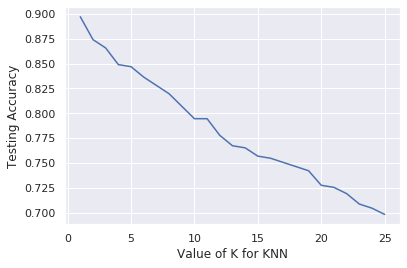

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [0]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X,Y)
KNNpred = knn.predict(X_test)

In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,knn.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, KNNpred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, KNNpred)
print(confusion_matrix(Y_test, KNNpred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, KNNpred)  
print("MCC = ",mcc1)

In [0]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

K = 10
acc = -7
Sn = -7
Sp = -7
C = -7
sigma = -7
error = 77777777

for p in range(-8, 9):
    for q in range(-8, 9):
        svm = SVC(C=2**p, gamma=2**q)
        y_pred = cross_val_predict(svm, X_test, Y_test, cv=K)
            
        cm = confusion_matrix(Y_test, y_pred)
        pos = cm[1,1] / (cm[1,1] + cm[1,0])
        neg = cm[0,0] / (cm[0,0] + cm[0,1])
            
        err = abs(pos-neg)
            
        if (error>err):
            error = err
            C = 2**p
            sigma = 2**q
            Sn = pos
            Sp = neg
            acc = accuracy_score(Y_test, y_pred)
            print(acc)

# Bagging

In [0]:
>>> from imblearn.ensemble import BalancedBaggingClassifier
>>> bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
...                                 sampling_strategy='auto',
...                                 replacement=False,
...                                 random_state=0)
>>> bbc.fit(X_train, Y_train)
Bagpred = bbc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,bbc.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Bagpred))

#Independent
#IND_pred = bbc.predict(IND_X_test)
#print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, Bagpred)
print(confusion_matrix(Y_test, Bagpred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, Bagpred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.37079026342114035
Test Accuracy  ::  0.2934131736526946
[[38  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy :  0.11377245508982035
Sensitivity :  1.0
Specificity :  nan
MCC =  0.26633543472956


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


# Balanced Random Forest

In [0]:
>>> from imblearn.ensemble import BalancedRandomForestClassifier
>>> brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
>>> brf.fit(X_train, Y_train) 
brf_pred=brf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,brf.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, brf_pred))
#from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(Y_test, brf_pred)
print(confusion_matrix(Y_test, brf_pred))
#print(classification_report(Y_test, brf_pred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

from sklearn.metrics import matthews_corrcoef
mcc1=matthews_corrcoef(Y_test, brf_pred)  
print("MCC = ",mcc1)

Train Accuracy ::  0.2920973657885962
Test Accuracy  ::  0.23952095808383234
[[33  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy :  0.09880239520958084
Sensitivity :  1.0
Specificity :  nan
MCC =  0.23261233286034227


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


# Boosting

In [0]:
>>> from imblearn.ensemble import RUSBoostClassifier
>>> rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R', random_state=0)
>>> rusboost.fit(X_train, Y_train)  
>>> Y_pred = rusboost.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Train Accuracy :: ", accuracy_score(Y_train,rusboost.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, Y_pred))

#Independent
#IND_pred = rusboost.predict(IND_X_test)
#print("Independent Test Accuracy  :: ", accuracy_score(IND_Y_test, IND_pred))

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
cm1=confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, NBpred))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import matthews_corrcoef
mcc2=matthews_corrcoef(Y_test, Y_pred)  
print("MCC = ",mcc2)

# **CNN**

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(2999,21,100)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=0)
# evaluate model
accuracy = model.evaluate(X_test, Y_test, batch_size=32, verbose=0)

ValueError: ignored